<a href="https://colab.research.google.com/github/Shhreya-Anand/ds/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filepath: '/content/iris.csv/'


In [16]:
import numpy as np
import pandas as pd #because we want to manipulate csv

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #will split dataset
from sklearn.preprocessing import MinMaxScaler #helps with normalising

from collections import Counter

from matplotlib import pyplot as plt

In [50]:
#this code block is for training data

class KNN_classifier:
  def __init__(self,k, scalar=None):
    self.k = k
    self.X_train=None #X is a matrix or vector so it is represented with a capital X
    self.y_train=None #y is small y because its a value or class with a single entity

    if scalar:
      self.scalar=scalar
    else:
      self.scalar=MinMaxScaler()

  def load_and_prepare_data(self, dataset_path, normalize=True):
    df=pd.read_csv(dataset_path)
    #iloc- integer location
    X = df.iloc[:, :-1].values #except for label select all values of an instance
    y = df.iloc[ : ,-1].values #taking the whole vertical column of the last column as they are all labels

    X, y= shuffle(X, y) #this function is shuffled randomly
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#we're usning 20% of dataset randomly as testing dataset
    X_train, X_test= self.normalize_data(X_train, X_test)
    return X_train, X_test,y_train, y_test

  def normalize_data(self, X_train, X_test):
    X_train=self.scalar.fit_transform(X_train)
    X_test=self.scalar.transform(X_test)
    return X_train, X_test

  def fit(self, X_train, y_train):
    #store training data
    self.X_train=X_train
    self.y_train=y_train

  def predict(self, X_data):
    #predict the class for each test sample
    prediction = []

    for x in X_data:
      distance=self.compute_distance(x)
      find_k_nearest=self.find_k_nearest(distance)
      vote=self.majority_vote(find_k_nearest)
      prediction.append(vote)

    return prediction

  def compute_distance(self, x):
      #compute distance between x and all training samples
      distance = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
      return distance

  def find_k_nearest(self, distance):

      k_nearest_indices=np.argsort(distance)[ :self.k]
      return k_nearest_indices

  def majority_vote(self, neighbour_indices):

      #extract the labels of the nearest neighbour
      neighbour_label= [self.y_train[i] for i in neighbour_indices]

      #count occurences of each label amongst the neighbours
      label_counts=Counter(neighbour_label)

      #find the label with the maximum count (majority of votes)
      majority_label=label_counts.most_common(1)[0][0]
      return majority_label

  def acc_eval(self, y_true, y_pred):


      #calculate number of correct predictions
      correct_predictions=sum(y_pred==y_true)

      #calculate accuracy as the proportion of correct predictions
      accuracy= correct_predictions/len(y_true)

      return accuracy

  def gen_plot(self, k_vals, train_acc, test_acc, std_train_acc, std_test_acc, normalize):
        #Graph to plot accuracy over varying training set
        plt.figure(figsize=(10,5))
        plt.errorbar(k_vals, train_acc, yerr=std_train_acc, label='Training Accuracy')
        plt.xlabel('Values of k for KNN')

        if normalize: #if normalise =true, this is how you write it
          plt.ylabel('Training set accuracy with normalized data')
        else:
          plt.ylabel('Training set accuracy without normalized data')


        plt.title('kNN accuracy with varying k')
        plt.grid(True)
        plt.show()

      #Graph to plot accuracy over varying testing set
        plt.errorbar(k_vals, test_acc, yerr=std_test_acc, label='Testing Accuracy')
        plt.xlabel('Values of k for KNN')

        if normalize: #if normalise =true, this is how you write it
          plt.ylabel('Testing set accuracy with normalized data')
        else:
          plt.ylabel('Testing set accuracy without normalized data')


        plt.title('kNN accuracy with varying k')
        plt.grid(True)
        plt.show()


  def run_experiment(self, dataset_path, normalize=True):


    k_values=range(1,52,1) #we're only taking odd values of k from 1 to 51
    repetitions=20 #no of times/repetitions from each k value

    training_acc=np.zeros((len(k_values), repetitions))
      #initialising a numpy array with len(k_values) x repetitions
    testing_acc=np.zeros((len(k_values), repetitions))

    for index, k in enumerate (k_values):

      for repetition in range (repetitions): # I want to start with 1 repetition in the range of 20 repetitions

        classifier=KNN_classifier(k=k, scalar=self.scalar)

            #load and prepare the dataset

        X_train, X_test, y_train, y_test=classifier.load_and_prepare_data(dataset_path, normalize=normalize)# normalize=normalize is a building on def load and prepare data functions normalise variable

            #fit the data
        classifier.fit(X_train, y_train)

            #Predict on training and testing sets
        y_train_pred =classifier.predict(X_train)
        y_test_pred=classifier.predict (X_test)

            #Calculate and sort accuracies

        training_acc[index, repetition]=classifier.acc_eval(y_train, y_train_pred)
        testing_acc[index, repetition]=classifier.acc_eval(y_test, y_test_pred) #.evalu(actual, expected)

      #Calculate average accuracies and standard deviation for plotting
    avg_training_acc=np.mean(training_acc, axis = 1)
    std_training_acc=np.std(training_acc, axis = 1)

      #std is standard deviation

    avg_testing_acc=np.mean(testing_acc, axis = 1)
    std_testing_acc=np.std(testing_acc, axis = 1)

      #Plotting the results
    self.gen_plot(k_values, avg_training_acc, avg_testing_acc, std_training_acc, std_testing_acc, normalize=True)

    return [avg_training_acc, std_training_acc, avg_testing_acc, std_testing_acc]





















##Set up experimental loop and statistical analysis


In [51]:
dataset_path='/content/iris.csv'

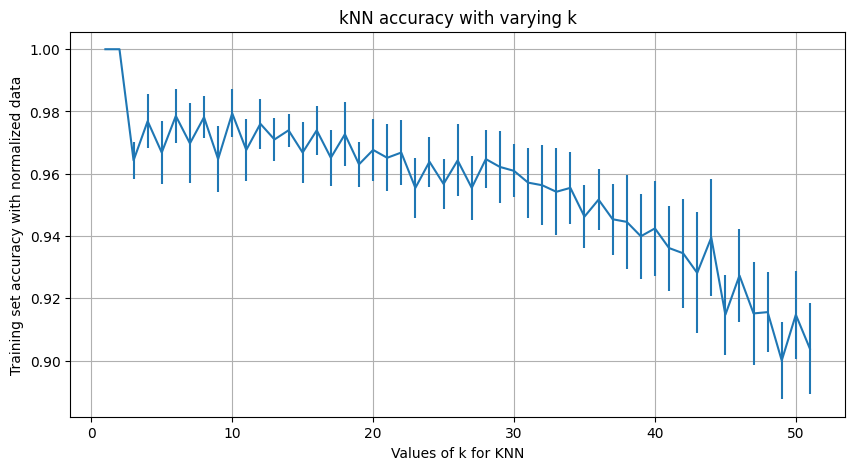

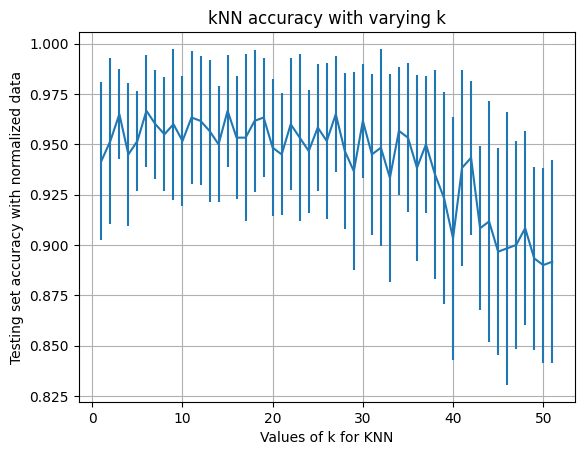

[array([1.        , 1.        , 0.96428571, 0.97689076, 0.96680672,
        0.97857143, 0.9697479 , 0.97815126, 0.96470588, 0.97941176,
        0.96764706, 0.97605042, 0.9710084 , 0.97394958, 0.96680672,
        0.97394958, 0.96512605, 0.97268908, 0.96302521, 0.96764706,
        0.96512605, 0.96680672, 0.95546218, 0.96386555, 0.95672269,
        0.96428571, 0.95546218, 0.96470588, 0.96218487, 0.96092437,
        0.95714286, 0.95630252, 0.95420168, 0.95546218, 0.94621849,
        0.95168067, 0.94537815, 0.94453782, 0.93991597, 0.94243697,
        0.93613445, 0.93445378, 0.92815126, 0.9394958 , 0.91470588,
        0.92731092, 0.91512605, 0.91554622, 0.9       , 0.91470588,
        0.90378151]),
 array([0.        , 0.        , 0.00586733, 0.0087633 , 0.01011026,
        0.00860063, 0.01285467, 0.00672269, 0.01049579, 0.00773611,
        0.01004017, 0.00809301, 0.00676197, 0.0052479 , 0.00975478,
        0.00792772, 0.00892301, 0.010249  , 0.00722884, 0.01004017,
        0.01072046, 0.0104

In [52]:
classifier=KNN_classifier(k=1)

classifier.run_experiment(dataset_path, normalize=True)
